In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:\Asai Projekt\Asai-Projekt\heart_2020_cleaned.csv")
#df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/heart_2020_cleaned.csv")
df_orginal = df.copy()

In [5]:
import pandas as pd
heart_2020_cleaned = pd.read_csv('heart_2020_cleaned.csv', sep = ',')
heart_2020_cleaned

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
#DataFrame-Beispiel Daten
styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.600000,Yes,No,No,3.000000,30.000000,No,Female,55-59,White,Yes,Yes,Very good,5.000000,Yes,No,Yes
1,No,20.340000,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.000000,No,No,No
2,No,26.580000,Yes,No,No,20.000000,30.000000,No,Male,65-69,White,Yes,Yes,Fair,8.000000,Yes,No,No
3,No,24.210000,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.000000,No,No,Yes
4,No,23.710000,No,No,No,28.000000,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.000000,No,No,No
5,Yes,28.870000,Yes,No,No,6.000000,0.000000,Yes,Female,75-79,Black,No,No,Fair,12.000000,No,No,No
6,No,21.630000,No,No,No,15.000000,0.000000,No,Female,70-74,White,No,Yes,Fair,4.000000,Yes,No,Yes
7,No,31.640000,Yes,No,No,5.000000,0.000000,Yes,Female,80 or older,White,Yes,No,Good,9.000000,Yes,No,No
8,No,26.450000,No,No,No,0.000000,0.000000,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.000000,No,Yes,No
9,No,40.690000,No,No,No,0.000000,0.000000,Yes,Male,65-69,White,No,Yes,Good,10.000000,No,No,No


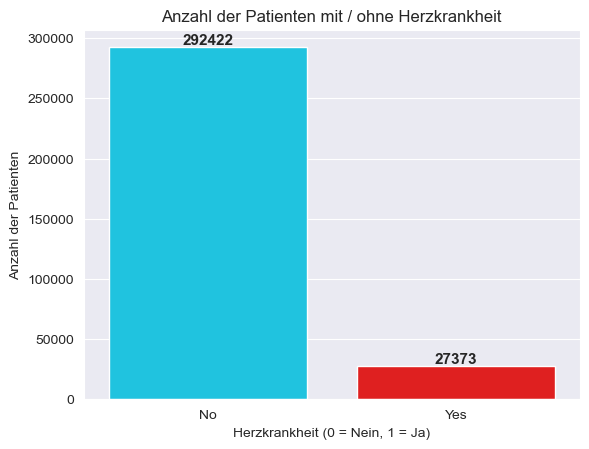

Anzahl der Zeilen (Patienten): 319795
Anzahl der Spalten (Features): 18


In [11]:
#Balkendiagramm Anteil Herzerkrankte

# Balkendiagramm OHNE FutureWarning
ax = sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=['#00d9ff', '#ff0000'], legend=False)


# Achsentitel
plt.title('Anzahl der Patienten mit / ohne Herzkrankheit')
plt.xlabel('Herzkrankheit (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl der Patienten')

# Zahlen über Balken schreiben
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Plot anzeigen
plt.show()
print(f"Anzahl der Zeilen (Patienten): {df.shape[0]}")
print(f"Anzahl der Spalten (Features): {df.shape[1]}")

In [12]:
# Daten Vorverarbeitung
# Duplikate checken
# Alle duplizierten Zeilen (inkl. Erstvorkommen)
duplikate_df = df[df.duplicated(keep=False)]

# Anzahl und Prozent Duplikate
anzahl_duplikate = len(duplikate_df)
gesamt = len(df)
prozent_duplikate = (anzahl_duplikate / gesamt) * 100

# Verteilung HeartDisease in den Duplikaten
verteilung_duplikate = duplikate_df['HeartDisease'].value_counts(normalize=True) * 100

# Verteilung HeartDisease im gesamten DataFrame
verteilung_gesamt = df['HeartDisease'].value_counts(normalize=True) * 100

# Ausgabe
print("Gesamtzeilen:", gesamt)
print("Anzahl mehrfach vorkommender Zeilen:", anzahl_duplikate)
print(f"Prozent mehrfach vorkommend: {prozent_duplikate:.2f}%\n")

print("Verteilung von Heartdisease innerhalb der Duplikate:")
if not verteilung_duplikate.empty:
    for wert, proz in verteilung_duplikate.items():
        print(f"  {wert}: {proz:.2f}%")
else:
    print("    - - -")

print("\nGesamtverteilung HeartDisease:")
for wert, proz in verteilung_gesamt.items():
    print(f"  {wert}: {proz:.2f}%")

Gesamtzeilen: 319795
Anzahl mehrfach vorkommender Zeilen: 29930
Prozent mehrfach vorkommend: 9.36%

Verteilung von Heartdisease innerhalb der Duplikate:
  No: 99.27%
  Yes: 0.73%

Gesamtverteilung HeartDisease:
  No: 91.44%
  Yes: 8.56%


In [14]:
# Duplikate entfernen
df = df.drop_duplicates()


In [13]:
# Fehlende Werte prüfen
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [18]:
# Typprüfung
# also ob wirklich die im Datensatz angegebenen Datentypen und beizeichnungen stimen
def check_values(df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte '{column_type}' nicht im Datensatz gefunden.")
        return

    values = df[column_type].dropna().unique()
    invalid = set(values).difference(set(valid_values))
    if invalid:
         print(f" Ungültige Werte in Spalte '{column_type}': {(invalid)} ")
    else:
        print(f"Alle Werte in Spalte '{column_type}' sind gültig ")

valid_values_dict = {
    "Sex": {'Male', 'Female'},
    "Smoking": {'Yes', 'No'},
    "AlcoholDrinking": {'Yes', 'No'},
    "Diabetic": {
        'Yes', 'No',
        'No, borderline diabetes',
        'Yes (during pregnancy)'
    },
    "GenHealth": {'Excellent', 'Very good', 'Good', 'Fair', 'Poor'},
    "Race": {
        'White', 'Black', 'Asian',
        'American Indian/Alaskan Native',
        'Other', 'Hispanic'
    },
    "AgeCategory": {
        '18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
        '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'
    },
    "Asthma": {'Yes', 'No'},
    "KidneyDisease": {'Yes', 'No'},
    "SkinCancer": {'Yes', 'No'},
    "Stroke": {'Yes', 'No'},
    "DiffWalking": {'Yes', 'No'},
    "PhysicalActivity": {'Yes', 'No'},
    "HeartDisease": {'Yes', 'No'}
}


def check_if_numeric (df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte {column_type}' nicht im Datensatz gefunden.")
        return
    else:
        non_numeric = df[column_type].dropna().apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric.any():
            count_invalid = non_numeric.sum()
            print(f"{count_invalid} nicht numerische Werte in Spalte '{column_type}'")
            print(f"Beispiele: {df[column_type][non_numeric].unique()[:5]}")
        else:
            print(f"Alle Werte in Spalte '{column_type}' sind numerisch.")

numeric_columns = [
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime',
]


# Anwendung:
for column, valid_set in valid_values_dict.items():
    check_values(df, column, valid_set)

for col in numeric_columns:
    check_if_numeric(df, col, numeric_columns)

Alle Werte in Spalte 'Sex' sind gültig 
Alle Werte in Spalte 'Smoking' sind gültig 
Alle Werte in Spalte 'AlcoholDrinking' sind gültig 
Alle Werte in Spalte 'Diabetic' sind gültig 
Alle Werte in Spalte 'GenHealth' sind gültig 
Alle Werte in Spalte 'Race' sind gültig 
Alle Werte in Spalte 'AgeCategory' sind gültig 
Alle Werte in Spalte 'Asthma' sind gültig 
Alle Werte in Spalte 'KidneyDisease' sind gültig 
Alle Werte in Spalte 'SkinCancer' sind gültig 
Alle Werte in Spalte 'Stroke' sind gültig 
Alle Werte in Spalte 'DiffWalking' sind gültig 
Alle Werte in Spalte 'PhysicalActivity' sind gültig 
Alle Werte in Spalte 'HeartDisease' sind gültig 
Alle Werte in Spalte 'BMI' sind numerisch.
Alle Werte in Spalte 'PhysicalHealth' sind numerisch.
Alle Werte in Spalte 'MentalHealth' sind numerisch.
Alle Werte in Spalte 'SleepTime' sind numerisch.


In [19]:
print(f"Anzahl an Zeilen: {len(df)}")
# Unrealistische Werte
# aufgrund von Medizinischen Hintergründen
def check_unrealistic_values(columnName, min_val, max_val):

    series = df[columnName]
    _df = df[(df[columnName] >= min_val) & (df[columnName] <= max_val)]

    invalid = series[(series < min_val) | (series > max_val)]
    print(f"{columnName}: {len(invalid)} Werte außerhalb des akzeptieren Bereichs '{min_val}-{max_val}'")
    #print(f"    Beispiele: {invalid.unique()[:5]}")
    return _df


df = check_unrealistic_values('BMI', 12, 70)
df = check_unrealistic_values('SleepTime', 2, 18)


print(f"Neue Anzahl an Zeilen: {len(df)}")

Anzahl an Zeilen: 301717
BMI: 129 Werte außerhalb des akzeptieren Bereichs '12-70'
SleepTime: 662 Werte außerhalb des akzeptieren Bereichs '2-18'
Neue Anzahl an Zeilen: 300926


=== Altersverteilung ===
count     300926
unique        13
top        65-69
freq       31598
Name: AgeCategory, dtype: object


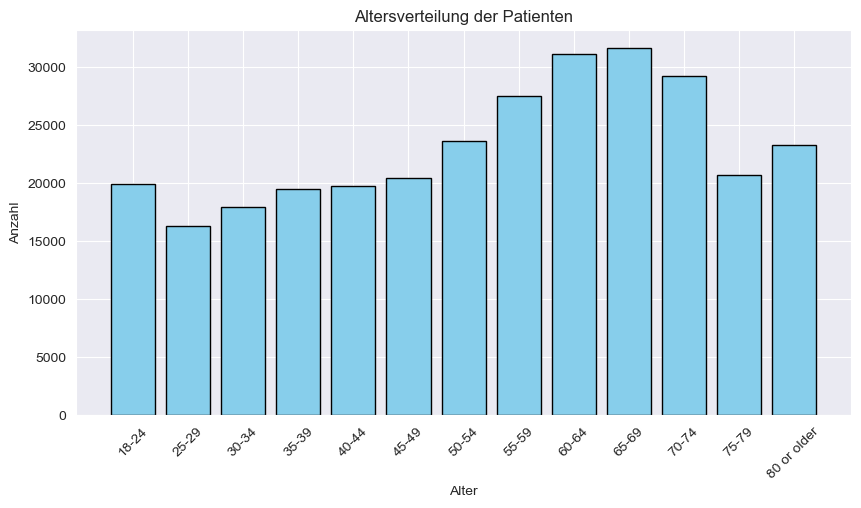

In [27]:
#Bias/Korrelation

print("=== Altersverteilung ===")
print(df['AgeCategory'].describe())

# Manuell definierte sinnvolle Reihenfolge
age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44',
    '45-49', '50-54', '55-59', '60-64', '65-69',
    '70-74', '75-79', '80 or older'
]

# Zählen und korrekt sortieren
age_counts = df['AgeCategory'].value_counts().reindex(age_order)

# Plot
plt.figure(figsize=(10,5))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
plt.title('Altersverteilung der Patienten')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.show()

=== Geschlechterverteilung ===
Female: 159282 Patienten (52.93%)
Male: 141644 Patienten (47.07%)


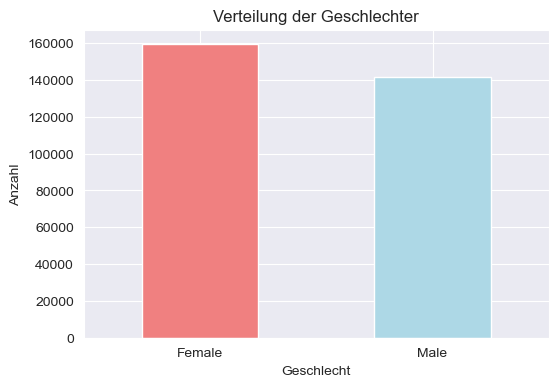

In [26]:


print("=== Geschlechterverteilung ===")
gender_counts = df['Sex'].value_counts()
gender_percent = df['Sex'].value_counts(normalize=True) * 100

for sex in gender_counts.index:
    print(f"{sex}: {gender_counts[sex]} Patienten ({gender_percent[sex]:.2f}%)")

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Verteilung der Geschlechter')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()
